<a href="https://colab.research.google.com/github/InsightMart/DSPL_project/blob/main/model3_sithuli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Load the dataset
file_path = '/content/cleaned_train_data.csv'
df = pd.read_csv(file_path)


In [ ]:
# Handle missing values
df.dropna(inplace=True)


In [ ]:
# Define features and target
X = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'Encoded_outlet_city']]
y = df['cluster_catgeory']


In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)


In [ ]:
# Define models with hyperparameter tuning using GridSearchCV
grids = {
    'Logistic Regression': GridSearchCV(LogisticRegression(), param_grid={'C': [0.01, 0.1, 1, 10]}, cv=5),
    'Random Forest': GridSearchCV(RandomForestClassifier(random_state=42), param_grid={'n_estimators': [50, 100, 200]}, cv=5),
    'XGBoost': GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid={'n_estimators': [50, 100, 200]}, cv=5)
}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression Performance:
Best Parameters: {'C': 10}
Accuracy: 0.9627936015845335
Confusion Matrix:
 [[56675     3     2   221     0     1]
 [    4 46213     2     2     2   213]
 [    1     1 11086     2  3549     0]
 [  236     0     4 51235     3     1]
 [    1     1  4169     4  7715     2]
 [    0   205     3     6     3 50680]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     56902
           2       1.00      1.00      1.00     46436
           3       0.73      0.76      0.74     14639
           4       1.00      1.00      1.00     51479
           5       0.68      0.65      0.67     11892
           6       1.00      1.00      1.00     50897

    accuracy                           0.96    232245
   macro avg       0.90      0.90      0.90    232245
weighted avg       0.96      0.96      0.96    232245



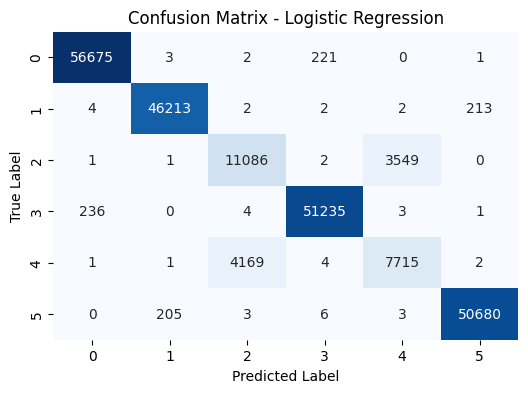

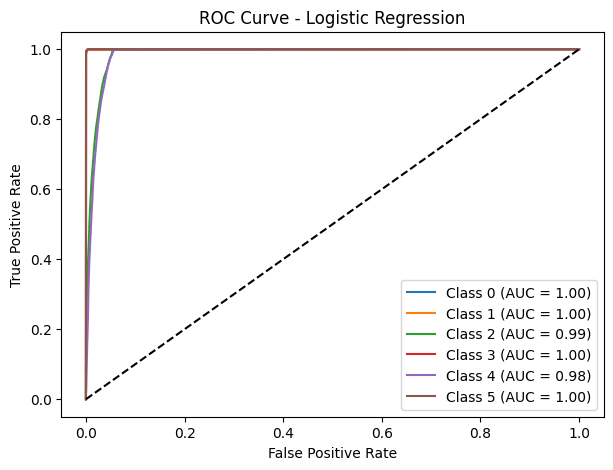

In [ ]:
# Train and evaluate models
for name, grid in grids.items():
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Print performance metrics
    print(f'\n{name} Performance:')
    print('Best Parameters:', grid.best_params_)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve (only if more than one class exists)
    if len(np.unique(y)) > 2:
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_score = best_model.predict_proba(X_test)

        plt.figure(figsize=(7,5))
        for i in range(y_test_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
